# AIRLINE DATASET

____________________________________________________________________

In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")




In [ ]:


sns.set(style = 'darkgrid')

  

# Reading Dataset and Checking the NaN Values , Data Types , and Statistical Analysis
1. Since data is in form of excel file we have to use pandas read_excel to load the data

2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row

3. Check whether any null values are there or not. if it is present then following can be done,

4. Filling NaN values with mean, median and mode using fillna() method
Describe data --> which can give statistical analysis

In [ ]:


df = pd.read_excel("Data_Train.xlsx")



In [ ]:

df


In [ ]:

df.shape


In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:

df.describe(include=object)


In [ ]:

df.describe(include=float)


In [ ]:

df.isnull().sum()


In [ ]:

df.isnull().sum()/df.shape[0]*100


In [ ]:

df['Airline'].mode()


In [ ]:

df['Airline']=df['Airline'].fillna(df['Airline'].mode()[0])


In [ ]:

df.isnull().sum()


In [ ]:

df['Date_of_Journey'].mode()


In [ ]:

df['Date_of_Journey']=df['Date_of_Journey'].fillna(df['Date_of_Journey'].mode()[0])


In [ ]:

df['Source'].mode()


In [ ]:

df['Source']=df['Source'].fillna(df['Source'].mode()[0])


In [ ]:

df['Destination'].mode()


In [ ]:

df['Destination']=df['Destination'].fillna(df['Destination'].mode()[0])


In [ ]:
df['Route'].mode()

In [ ]:

df['Route']=df['Route'].fillna(df['Route'].mode()[0])


In [ ]:

df.isnull().sum()


In [ ]:

df['Dep_Time'].mode()


In [ ]:

df['Dep_Time']=df['Dep_Time'].fillna(df['Dep_Time'].mode()[0])


In [ ]:
df['Arrival_Time'].mode()

In [ ]:
df['Arrival_Time']=df['Arrival_Time'].fillna(df['Arrival_Time'].mode()[0])

In [ ]:

df['Duration'].mode()


In [ ]:

df['Duration']=df['Duration'].fillna(df['Duration'].mode()[0])


In [ ]:
df['Total_Stops'].mode()

In [ ]:
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [ ]:

df['Additional_Info'].mode()


In [ ]:
df['Additional_Info']=df['Additional_Info'].fillna(df['Additional_Info'].mode()[0])

In [ ]:
df['Price'].mean()

In [ ]:
df['Price'].median()

In [ ]:
sns.boxplot(df.Price,color='red')

In [ ]:
df['Price']=df['Price'].fillna(df['Price'].mean())

In [ ]:
df.isnull().sum()

# From df.info() we can see that Date_of_Journey is a object data type
1. Therefore, we have to convert this datatype into timestamp so that we can use that column properly to find the insights.

2. For this we require pandas to_datetime to convert object data type to datetime dtype.

In [ ]:

df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])



In [ ]:

df.info()


# We can see that Total_Stops is a Categorical column we can replace that column data into categories

In [ ]:
df

In [ ]:

df.replace({"non-stop": 0 , "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [ ]:

df


# 1st Insights: How many Flights with respect to their Stopages ?

In [ ]:


# From This Histogram  we can see that no.of flights and their Stopages
# In this Data maximum flights have 1 stopages 
# And there are few flights which have 3rd and 4th stopages 

plt.title("Flights with respect to their Stopages")
plt.hist(df['Total_Stops'], color='red')
plt.xlabel("STOPS")
plt.ylabel("FLIGHTS")
plt.show()



In [ ]:

df['Total_Stops'].value_counts()


3481 fligths have 0 Stopages

5742 fligths have 1 Stopages

1520 fligths have 2 Stopages

45   fligths have 3 Stopages

1    fligths have 4 Stopages


# 2nd Insights: What flight is Expensive and Cheaper 

In [ ]:
df

In [ ]:
df.groupby(['Airline'])['Price'].max().sort_values(ascending=False)

Jet Airways Business is most expensive flight and Trujet is cheaper one

In [ ]:
sns.boxplot(x='Airline', y='Price', data=df)
plt.xticks(rotation=90,size=11)
plt.title('Flight vs Prices')
plt.show()

# 3rd Insights: Variation of Flight Price from Source

In [ ]:
sns.boxplot(x='Source',y='Price', data=df)
plt.xticks(rotation=90,size=11)
plt.title('SOURCE V/S PRICE')
plt.show()



From this boxplot we can see the maximum Outliers are in Bangalore and Minimum in KolKata

In [ ]:
df.head(20)

In [ ]:

df[df['Total_Stops']==4]


In [ ]:

df[df['Total_Stops']==3]


In [ ]:

df.loc[df['Total_Stops']==2]


In [ ]:

df.loc[df['Total_Stops']==1]


In [ ]:

df[df['Total_Stops']==0]


# Extracting Journey Day and Month
For this we require pandas to_datetime to convert object data type to datetime dtype.

.dt.day method will extract only day of that date

.dt.month method will extract only month of that date

In [ ]:

df['Month_of_Journey']=pd.to_datetime(df['Date_of_Journey']).dt.month


In [ ]:

df['Day_of_Journey']=pd.to_datetime(df['Date_of_Journey']).dt.day


In [ ]:

# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
df.drop(columns=['Date_of_Journey'], inplace=True)


In [ ]:


# Departure time is when a plane leaves the gate. 

# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df.drop(["Dep_Time"], axis = 1, inplace = True)



In [ ]:
# Arrival time is when the plane pulls up to the gate.

# Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [166]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.000000,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.000000,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.000000,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.000000,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.000000,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10794,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2h 50m,1,No info,9087.064121,5,18,18,55,19,0
10795,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2h 50m,1,No info,9087.064121,5,18,18,55,19,0
10796,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2h 50m,1,No info,9087.064121,5,18,18,55,19,0
10797,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2h 50m,1,No info,9087.064121,5,18,18,55,19,0


# 4th Insights: On What Day and Month Have Flight Maximum Stopages

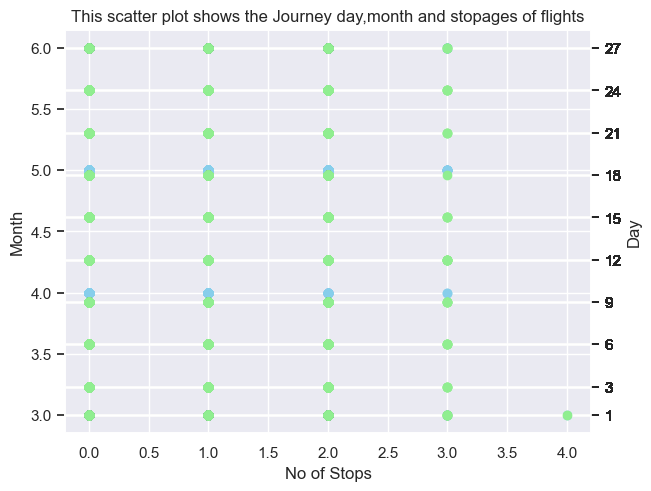

In [168]:
fiSg, ax = plt.subplots(constrained_layout=True)
month=list(df['Month_of_Journey'])
stopages=list(df["Total_Stops"])
day=list(df['Day_of_Journey'])
ax2=ax.twinx()
ax.scatter(stopages,month,color="skyblue")
ax2.scatter(stopages,day,color="lightgreen")
ax.set_xlabel('No of Stops')
ax.set_ylabel('Month')
ax2.set_ylabel('Day')
plt.xticks(rotation=80,size=3)
plt.title("This scatter plot shows the Journey day,month and stopages of flights")
plt.yticks(day)
plt.show()

# 5th Insights: On what Month have Maximum Flights Take off ?


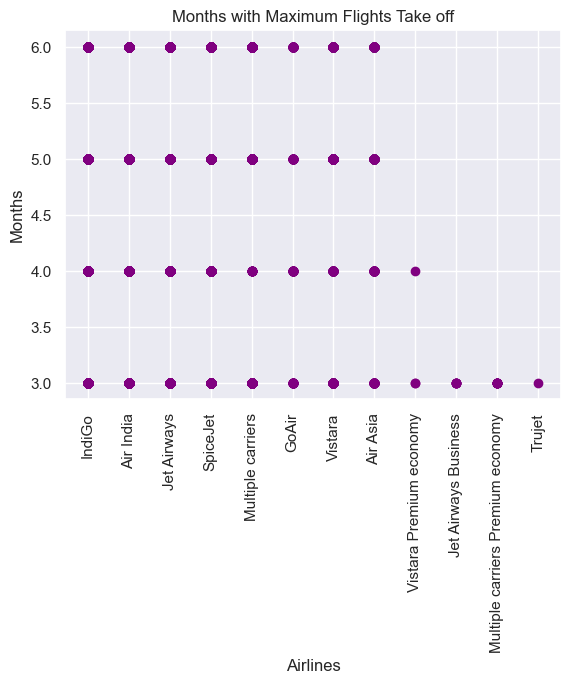

In [170]:
plt.title("Months with Maximum Flights Take off")
plt.scatter(df['Airline'],df['Month_of_Journey'], color='purple')
plt.xlabel("Airlines")
plt.ylabel("Months")
plt.xticks(rotation=90)
plt.show()

# 6th Insights: What Month has The Maximum Earning

In [172]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.000000,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.000000,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.000000,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.000000,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.000000,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10794,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2h 50m,1,No info,9087.064121,5,18,18,55,19,0
10795,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2h 50m,1,No info,9087.064121,5,18,18,55,19,0
10796,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2h 50m,1,No info,9087.064121,5,18,18,55,19,0
10797,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2h 50m,1,No info,9087.064121,5,18,18,55,19,0


In [174]:

df.groupby(['Month_of_Journey'])['Price'].sum()


Month_of_Journey
3    2.907381e+07
4    6.226744e+06
5    3.268914e+07
6    3.014151e+07
Name: Price, dtype: float64

Month_of_Journey

1     11279591

3     18647220

4      2217885

5     19414875

6     23369151

9     13429373

12     8719011

Name: Price, dtype: int64

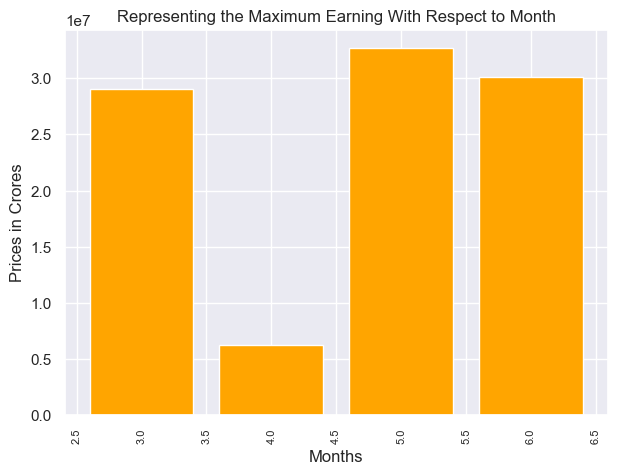

In [180]:
month_prices = df.groupby("Month_of_Journey")["Price"].sum()

plt.figure(figsize=(7,5))
plt.title('Representing the Maximum Earning With Respect to Month')
keys=[months for months,df in df.groupby(["Month_of_Journey"])]

plt.bar(month_prices.index, month_prices.values, color='orange')
plt.xlabel('Months')
plt.ylabel('Prices in Crores')
plt.xticks(rotation=90,size=8)
plt.show()



In [182]:

df["Source"].unique()


array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [184]:

df['Airline'].unique()


array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [186]:

df['Destination'].unique()


array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [190]:


#Removing New in New Delhi from Destination column
destination=[]
for i in df['Destination']:
    if i=='New Delhi':
        destination.append(i.replace('New Delhi','Delhi'))
    else:
        destination.append(i)
        
        

In [192]:
#Dropping the Destination column to add the New column
df.drop(columns=['Destination'],inplace=True)


In [194]:
df.head(3)

,Airline,Source,Route,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,BLR → DEL,2h 50m,0,No info,3897.0,3,24,22,20,1,10
1,Air India,Kolkata,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,5,1,5,50,13,15
2,Jet Airways,Delhi,DEL → LKO → BOM → COK,19h,2,No info,13882.0,6,9,9,25,4,25


In [196]:
#Adding the new Column Destination which have filltered city names
df['Destination']=pd.Series(destination)

In [198]:
# Making list of all columns 
cols=df.columns.tolist()
cols

['Airline',
 'Source',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Price',
 'Month_of_Journey',
 'Day_of_Journey',
 'Dep_hour',
 'Dep_min',
 'Arrival_hour',
 'Arrival_min',
 'Destination']

In [200]:

#Slicing to arrange the position of Destination column
cols=cols[0:3]+cols[-1:]+cols[3:11]
cols


['Airline',
 'Source',
 'Route',
 'Destination',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Price',
 'Month_of_Journey',
 'Day_of_Journey',
 'Dep_hour',
 'Dep_min']

In [202]:
#Assigning all the column to the dataframe
df=df[cols]

In [204]:

df.head(4)


,Airline,Source,Route,Destination,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Dep_hour,Dep_min
0,IndiGo,Banglore,BLR → DEL,Delhi,2h 50m,0,No info,3897.0,3,24,22,20
1,Air India,Kolkata,CCU → IXR → BBI → BLR,Banglore,7h 25m,2,No info,7662.0,5,1,5,50
2,Jet Airways,Delhi,DEL → LKO → BOM → COK,Cochin,19h,2,No info,13882.0,6,9,9,25
3,IndiGo,Kolkata,CCU → NAG → BLR,Banglore,5h 25m,1,No info,6218.0,5,12,18,5


In [206]:

df['Airline'].unique()


array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [208]:

df['Source'].unique()


array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [210]:

df['Destination'].unique()


array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

# 7th Insights: Checking the Availablity of Flight with respect to Source and Destination

In [213]:

df1=df.groupby(['Source','Destination',])['Airline'].value_counts()


In [215]:
df1

Source    Destination  Airline                          
Banglore  Delhi        Jet Airways                           788
                       IndiGo                                523
                       Air India                             332
                       Vistara                               185
                       SpiceJet                              181
                       GoAir                                  93
                       Air Asia                               89
                       Jet Airways Business                    4
                       Vistara Premium economy                 2
Chennai   Kolkata      IndiGo                                184
                       SpiceJet                              128
                       Vistara                                43
                       Air India                              25
                       Vistara Premium economy                 1
Delhi     Cochin       Jet Airway